In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import random

train_df = pd.DataFrame()
val_df = pd.DataFrame()
subjects = []
df1 = pd.read_csv(
    '/content/drive/MyDrive/Dataset_de_senales_para_entrenamiento/emg_dataset/train/subj01/1.txt', sep="\t",header=None)
df2 = pd.read_csv(
    '/content/drive/MyDrive/Dataset_de_senales_para_entrenamiento/emg_dataset/train/subj01/2.txt', sep="\t",header=None)

val_people = 0
for i in range(1, 31):
  r = random.random()
  subject_route1 = ''
  subject_route2 = ''
  
  if i < 10:
    subject_route1 = '/content/drive/MyDrive/Dataset_de_senales_para_entrenamiento/emg_dataset/train/subj0'+ str(i) +'/1.txt'
    subject_route2 = '/content/drive/MyDrive/Dataset_de_senales_para_entrenamiento/emg_dataset/train/subj0'+ str(i) +'/2.txt'
  else :
    subject_route1 = '/content/drive/MyDrive/Dataset_de_senales_para_entrenamiento/emg_dataset/train/subj'+ str(i) +'/1.txt'
    subject_route2 = '/content/drive/MyDrive/Dataset_de_senales_para_entrenamiento/emg_dataset/train/subj'+ str(i) +'/2.txt'
  
  subject_df1 = pd.read_csv(subject_route1, sep="\t")
  subject_df2 = pd.read_csv(subject_route2, sep="\t")
  subjects.append(subject_df1)
  if r < 0.8:
    train_df = pd.concat([train_df, subject_df1, subject_df2], axis=0)
    train_df = train_df.reset_index(drop=True)
  else:
    val_people += 1
    val_df = pd.concat([val_df, subject_df1, subject_df2], axis=0)
    val_df = val_df.reset_index(drop=True)

print(len(train_df))
print(len(val_df))


print("Porcentaje de sujetos en el conjunto de validación:", val_people/30)
train_df

2832968
649892
Porcentaje de sujetos en el conjunto de validación: 0.2


,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,2,-0.00001,0.00001,0.00000,0.00001,-0.00002,-0.00001,-0.00002,-0.00001,0
1,6,-0.00001,0.00001,0.00000,0.00001,-0.00002,-0.00001,-0.00002,-0.00001,0
2,8,-0.00001,0.00001,0.00000,0.00001,-0.00002,-0.00001,-0.00002,-0.00001,0
3,9,-0.00001,0.00001,0.00000,0.00001,-0.00002,-0.00001,-0.00002,-0.00001,0
4,10,-0.00001,0.00001,0.00000,0.00001,-0.00002,-0.00001,-0.00002,-0.00001,0
...,...,...,...,...,...,...,...,...,...,...
2832963,50640,-0.00002,-0.00003,-0.00003,-0.00004,-0.00002,-0.00003,-0.00002,0.00000,0
2832964,50641,-0.00002,-0.00003,-0.00003,-0.00004,-0.00002,-0.00003,-0.00002,0.00000,0
2832965,50642,-0.00002,-0.00003,-0.00003,-0.00004,-0.00002,-0.00003,-0.00002,0.00000,0
2832966,50643,-0.00002,-0.00003,-0.00003,-0.00004,-0.00002,-0.00003,-0.00002,0.00000,0


In [3]:
index0Names = train_df[ train_df['class'] == 0].index
index7Names = train_df[ train_df['class'] == 7].index
train_df.drop(index0Names , inplace=True)
train_df.drop(index7Names , inplace=True)
index0Names = val_df[ val_df['class'] == 0].index
index7Names = val_df[ val_df['class'] == 7].index
val_df.drop(index0Names , inplace=True)
val_df.drop(index7Names , inplace=True)
val_df = val_df.reset_index(drop=True)
train_df = train_df.reset_index(drop=True)
train_df

,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,2184,-0.00001,-0.00001,0.00002,-0.00002,-0.00001,-0.00001,-0.00001,-0.00001,1
1,2185,-0.00001,-0.00001,0.00002,-0.00002,-0.00001,-0.00001,-0.00001,-0.00001,1
2,2186,-0.00001,-0.00001,0.00002,-0.00002,-0.00001,-0.00001,-0.00001,-0.00001,1
3,2188,-0.00001,-0.00001,0.00002,-0.00002,-0.00001,-0.00001,-0.00001,-0.00001,1
4,2189,-0.00001,-0.00001,0.00002,-0.00002,-0.00001,-0.00001,-0.00001,-0.00001,1
...,...,...,...,...,...,...,...,...,...,...
1012969,49649,0.00008,0.00000,0.00001,-0.00005,-0.00052,0.00045,-0.00003,0.00052,6
1012970,49650,0.00008,0.00000,0.00001,-0.00005,-0.00052,0.00045,-0.00003,0.00052,6
1012971,49651,0.00008,0.00000,0.00001,-0.00005,-0.00052,0.00045,-0.00003,0.00052,6
1012972,49652,0.00008,0.00000,0.00001,-0.00005,-0.00052,0.00045,-0.00003,0.00052,6


In [4]:
train_df.columns[1:8]

Index(['channel1', 'channel2', 'channel3', 'channel4', 'channel5', 'channel6',
       'channel7'],
      dtype='object')

In [5]:
for column in train_df.columns[1:8]:
  train_df[column] = train_df[column] /train_df[column].abs().max()
  val_df[column] = val_df[column] /val_df[column].abs().max()

In [6]:
import numpy as np
import tensorflow as tf
import torch.nn as nn
from sklearn import preprocessing
from scipy.linalg import norm

def train_window_generator_matrix(df, w_size, w_step):
  #i ----> fila
  #j ----> columna
  id=0
  time = 0
  w_train_df = np.zeros([int(len(df)/800*4), 800, 8])
  r_train_df = []
  condition = True

  while condition:
    if time + 800 < len(df):
      first = df.loc[time]['class']
      last = df.loc[time+799]['class']

      if first  == last: 
        #Si todos los elementos de la ventana son de la misma clase se hace la ventana
        #sino no se hace nada y se sigue con el ciclo.
        for channel in range(1, 9):
          window = df.loc[time:time+799]['channel'+str(channel)].to_numpy()

          #window_normed = window/np.absolute(window).max()

          for i in range(0,len(window)):
            w_train_df[id][i][channel-1] = window[i]
        id += 1
        class_ECO = np.zeros([1,6])
        class_ECO[0][int(first-1)] = 1
        r_train_df.append(class_ECO)

      time += w_step
    else:
      condition = False

  w_train_df = np.delete(w_train_df, range(id , len(w_train_df)), 0)
  return w_train_df, r_train_df

train_windows, train_classes = train_window_generator_matrix(train_df, 800, 250)
val_windows, val_classes = train_window_generator_matrix(val_df, 800, 250)

In [7]:
train_windows[0, 799, :]
train_classes[0]

array([[1., 0., 0., 0., 0., 0.]])

In [8]:
print(train_windows.shape)
print(np.array(train_classes).shape)
print(val_windows.shape)
print(np.array(val_classes).shape)

(2193, 800, 8)
(2193, 1, 6)
(475, 800, 8)
(475, 1, 6)


In [9]:
#Poner los 8 canales en horizontal como columnas y los 800 del tamaño de la ventana hacia abajo (seria como el "time")
test_df = pd.read_csv(
    '/content/drive/MyDrive/Dataset_de_ventanas_de_prueba/emg_dataset/windows_test.csv', sep=",")

test_df

,Id,0,1,2,3,4,5,6,7,8,...,6390,6391,6392,6393,6394,6395,6396,6397,6398,6399
0,0,-0.00008,-0.00008,-0.00008,-0.00008,-0.00008,-0.00008,-0.00008,-0.00008,-0.00008,...,-0.00021,-0.00021,-0.00021,-0.00021,-0.00021,-0.00021,-0.00021,-0.00021,-0.00021,-0.00021
1,1,-0.00012,-0.00012,-0.00012,-0.00020,0.00011,0.00011,0.00011,0.00011,0.00011,...,0.00002,0.00002,0.00002,0.00002,0.00012,0.00012,0.00012,0.00012,0.00012,0.00012
2,2,-0.00006,-0.00006,-0.00006,-0.00006,-0.00006,-0.00006,-0.00006,-0.00006,-0.00006,...,-0.00014,-0.00014,-0.00014,-0.00014,-0.00014,-0.00014,-0.00014,0.00002,0.00002,-0.00020
3,3,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00001,0.00003,0.00010,0.00010,0.00010
4,4,-0.00055,-0.00055,-0.00055,-0.00055,-0.00055,-0.00055,-0.00055,-0.00055,-0.00055,...,-0.00040,-0.00040,0.00061,0.00040,0.00040,0.00040,0.00040,0.00040,0.00040,0.00040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,-0.00002,-0.00002,-0.00002,-0.00002,0.00002,-0.00008,-0.00008,-0.00008,-0.00008,...,-0.00008,-0.00008,-0.00008,-0.00008,-0.00008,-0.00008,-0.00008,-0.00008,-0.00008,-0.00008
668,668,0.00003,0.00003,0.00003,0.00003,-0.00002,0.00006,0.00006,0.00006,0.00006,...,-0.00001,-0.00001,-0.00001,-0.00001,-0.00001,-0.00001,-0.00001,-0.00001,-0.00001,-0.00001
669,669,0.00004,0.00004,0.00004,0.00004,0.00004,0.00004,0.00004,0.00004,0.00004,...,-0.00009,-0.00009,-0.00002,0.00015,0.00015,0.00015,0.00015,0.00015,0.00015,0.00015
670,670,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,0.00002,...,-0.00009,0.00004,0.00004,0.00004,0.00004,0.00004,0.00004,0.00004,0.00004,0.00004


In [10]:
all = test_df.iloc[:,(1-1)*800+1:1*800 +1]
all_normed = all/all.abs().max()
test_df.iloc[:,(1-1)*800+1:1*800 +1] = all_normed

In [11]:
from typing_extensions import ParamSpecArgs
def test_dataset_generator_matrix(df):
  #normalizacion
  for channel in range(1, 9):
    all = df.iloc[:,(channel-1)*800+1 : channel*800 +1]
    all_normed = all/all.abs().max()
    df.iloc[:,(channel-1)*800+1 : channel*800 +1] = all_normed

  #i ----> fila
  #j ----> columna
  id=0
  #dataset sera una matriz de dimensiones: cantidad de ventanas x dimension ventana x cantidad canales
  w_test_df = np.zeros((len(df), 800, 8))
  condition = True
  while condition:
    if len(df) <= id:
      condition = False
    else:
      for channel in range(1,9):
        window = df.iloc[id,(channel-1)*800 + 1:channel*800 +1].to_numpy()
        for i in range(0,len(window)):
          w_test_df[id][i][channel-1] = window[i]
      id += 1
      
  return w_test_df
test_windows = test_dataset_generator_matrix(test_df)

#Gráfico de señales



Text(0.5, 1.0, 'Gráfico de señal de canal 1 para un sujeto')

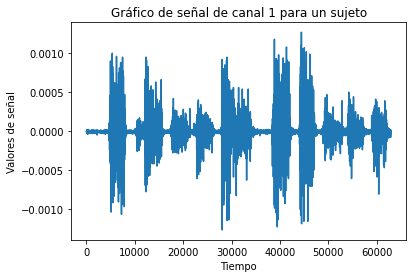

In [12]:
import matplotlib.pyplot as plt

x = subject_df1['time']
y = subject_df1['channel1']

plt.plot(x, y)
plt.xlabel("Tiempo")
plt.ylabel("Valores de señal")
plt.title("Gráfico de señal de canal 1 para un sujeto")




Text(0.5, 1.0, 'Gráfico de señal de canal 2 para un sujeto')

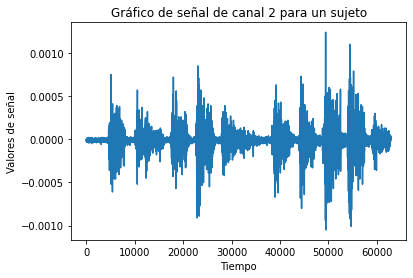

In [13]:
x = subject_df1['time']
y = subject_df1['channel2']

plt.plot(x, y)
plt.xlabel("Tiempo")
plt.ylabel("Valores de señal")
plt.title("Gráfico de señal de canal 2 para un sujeto")

Text(0.5, 1.0, 'Gráfico de señal de canal 3 para un sujeto')

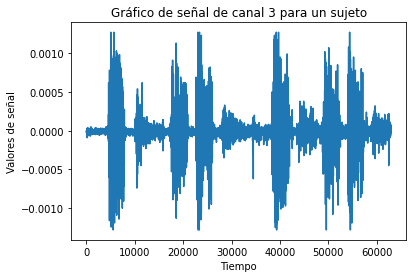

In [14]:
x = subject_df1['time']
y = subject_df1['channel3']

plt.plot(x, y)
plt.xlabel("Tiempo")
plt.ylabel("Valores de señal")
plt.title("Gráfico de señal de canal 3 para un sujeto")

Text(0.5, 1.0, 'Gráfico de señal de canal 4 para un sujeto')

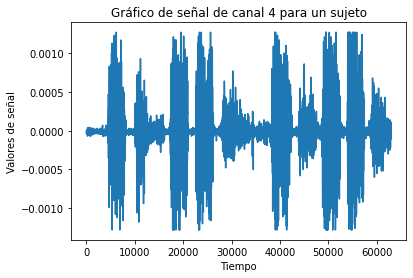

In [15]:
x = subject_df1['time']
y = subject_df1['channel4']

plt.plot(x, y)
plt.xlabel("Tiempo")
plt.ylabel("Valores de señal")
plt.title("Gráfico de señal de canal 4 para un sujeto")

Text(0.5, 1.0, 'Gráfico de señal de canal 5 para un sujeto')

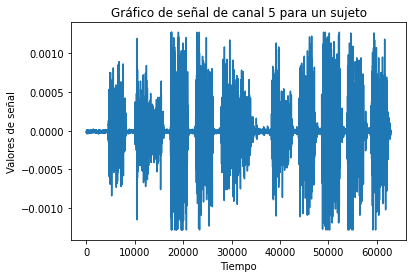

In [16]:
x = subject_df1['time']
y = subject_df1['channel5']

plt.plot(x, y)
plt.xlabel("Tiempo")
plt.ylabel("Valores de señal")
plt.title("Gráfico de señal de canal 5 para un sujeto")

Text(0.5, 1.0, 'Gráfico de señal de canal 6 para un sujeto')

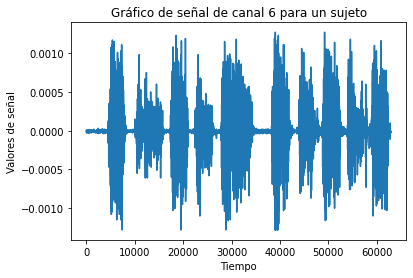

In [17]:
x = subject_df1['time']
y = subject_df1['channel6']

plt.plot(x, y)
plt.xlabel("Tiempo")
plt.ylabel("Valores de señal")
plt.title("Gráfico de señal de canal 6 para un sujeto")

Text(0.5, 1.0, 'Gráfico de señal de canal 7 para un sujeto')

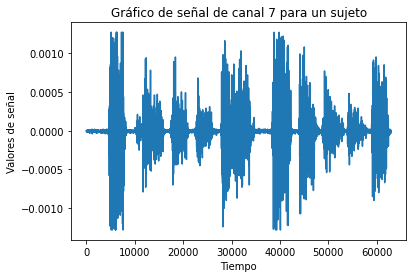

In [18]:
x = subject_df1['time']
y = subject_df1['channel7']

plt.plot(x, y)
plt.xlabel("Tiempo")
plt.ylabel("Valores de señal")
plt.title("Gráfico de señal de canal 7 para un sujeto")

Text(0.5, 1.0, 'Gráfico de señal de canal 8 para un sujeto')

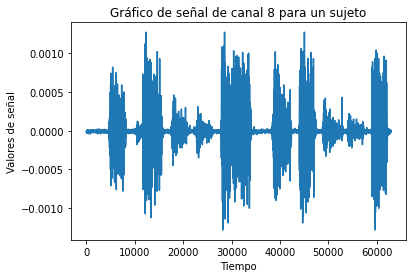

In [19]:
x = subject_df1['time']
y = subject_df1['channel8']

plt.plot(x, y)
plt.xlabel("Tiempo")
plt.ylabel("Valores de señal")
plt.title("Gráfico de señal de canal 8 para un sujeto")

(800,)


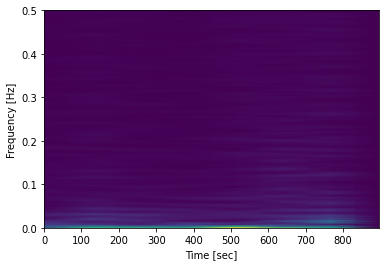

In [20]:
from scipy import signal
from scipy.fft import fftshift

x0 = train_windows[0, :, 0]
x1 = train_windows[0, :, 1]
x2 = train_windows[0, :, 2]
x3 = train_windows[0, :, 3]
x4 = train_windows[0, :, 4]
x5 = train_windows[0, :, 5]
x6 = train_windows[0, :, 6]
x7 = train_windows[0, :, 7]

x = x0 + x1 + x2 + x3 + x4 + x5 + x6 + x7 
print(x.shape)
f, t, Zxx = signal.stft(x)

plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [21]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from scipy import signal

def specgram_generator2(df):
  input_df = np.zeros([len(df), 129, 8, 8], dtype='float')
  print(input_df.shape)
  for i in range(0, len(df)):
    x0 = df[i, :, 0]
    x1 = df[i, :, 1]
    x2 = df[i, :, 2]
    x3 = df[i, :, 3]
    x4 = df[i, :, 4]
    x5 = df[i, :, 5]
    x6 = df[i, :, 6]
    x7 = df[i, :, 7]


    f0, t0, Sxx0 = signal.stft(x0)
    f1, t1, Sxx1 = signal.stft(x1)
    f2, t2, Sxx2 = signal.stft(x2)
    f3, t3, Sxx3 = signal.stft(x3)
    f4, t4, Sxx4 = signal.stft(x4)
    f5, t5, Sxx5 = signal.stft(x5)
    f6, t6, Sxx6 = signal.stft(x6)
    f7, t7, Sxx7 = signal.stft(x7)

    spec_list = [Sxx0, Sxx1, Sxx2, Sxx3, Sxx4, Sxx5, Sxx6, Sxx7]

    for spec_i in range(0, len(spec_list)) :
      #norms = np.linalg.norm(spec_list[spec_i])
      input_df[i, : , : , spec_i] = spec_list[spec_i]

  return input_df

train_input = specgram_generator2(train_windows)

(2193, 129, 8, 8)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


In [22]:
val_input = specgram_generator2(val_windows)

(475, 129, 8, 8)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


In [23]:
val_windows.shape

(475, 800, 8)

# Specgram


In [24]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from scipy.spatial import distance

import torchvision
import torchvision.transforms as transforms

#create model
model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(1, 4), activation="relu", input_shape=(129, 8 ,8), data_format="channels_last"))
model.add(layers.Dropout(0.15))

model.add(layers.ZeroPadding2D(padding=(1, 1)))
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(layers.Dropout(0.15))
model.add(layers.MaxPooling2D(pool_size=(4, 3), padding='valid'))

model.add(layers.ZeroPadding2D(padding=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(layers.Dropout(0.15))
model.add(layers.MaxPooling2D(pool_size=(5, 1), padding='valid'))

model.add(layers.ZeroPadding2D(padding=(2, 0)))
model.add(layers.Conv2D(filters=64, kernel_size=(5, 1), activation="relu"))
model.add(layers.MaxPooling2D(pool_size=(5, 1), padding='valid'))
model.add(layers.Dropout(0.15))


model.add(layers.Conv2D(filters=6, kernel_size=(1, 1), activation="softmax"))



#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [25]:
# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
print(train_input.shape)
print(np.array(train_classes).shape)
history = model.fit(train_input, np.array(train_classes).reshape(len(train_classes), 1, 1, 6), validation_data=(val_input, np.array(val_classes).reshape(len(val_classes), 1, 1, 6)),batch_size=batch_size, epochs=30)


Fit on NumPy data
(2193, 129, 8, 8)
(2193, 1, 6)
Epoch 1/30
35/35 [==============================] - 10s 29ms/step - loss: 1.7392 - accuracy: 0.2093 - val_loss: 1.6619 - val_accuracy: 0.3621
Epoch 2/30
35/35 [==============================] - 0s 8ms/step - loss: 1.5434 - accuracy: 0.4077 - val_loss: 1.4628 - val_accuracy: 0.4442
Epoch 3/30
35/35 [==============================] - 0s 9ms/step - loss: 1.3525 - accuracy: 0.4355 - val_loss: 1.3190 - val_accuracy: 0.4358
Epoch 4/30
35/35 [==============================] - 0s 9ms/step - loss: 1.2782 - accuracy: 0.4419 - val_loss: 1.2884 - val_accuracy: 0.4484
Epoch 5/30
35/35 [==============================] - 0s 7ms/step - loss: 1.2563 - accuracy: 0.4368 - val_loss: 1.2902 - val_accuracy: 0.4568
Epoch 6/30
35/35 [==============================] - 0s 8ms/step - loss: 1.2604 - accuracy: 0.4441 - val_loss: 1.2853 - val_accuracy: 0.4232
Epoch 7/30
35/35 [==============================] - 0s 8ms/step - loss: 1.2305 - accuracy: 0.4523 - val_loss:

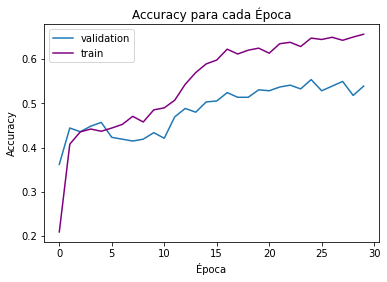

In [26]:
plt.plot(range(0,len(history.history['val_accuracy'])), history.history['val_accuracy'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.title("Accuracy para cada Época")
plt.plot(range(0,len(history.history['accuracy'])), history.history['accuracy'], label = "train", color = 'purple')
plt.legend()



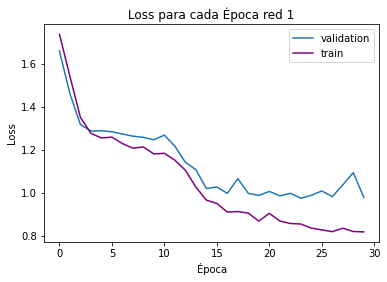

In [27]:
plt.plot(range(0,len(history.history['val_loss'])), history.history['val_loss'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss para cada Época red 1")
plt.plot(range(0,len(history.history['loss'])), history.history['loss'], label = "train", color = 'purple')
plt.legend()

In [28]:
y = np.argmax(val_classes, axis=2)
y = y.reshape(len(val_classes),)
y

array([0, 0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 0, 1, 2, 2, 3, 3, 3,
       4, 4, 5, 5, 5, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 5, 5, 5, 0,
       1, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2,
       3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 0, 0, 0, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 0, 0, 0,
       1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4,
       5, 5, 5, 5, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4,
       4, 4, 4, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3,
       3, 4, 4, 4, 5, 5, 5, 5, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3,
       4, 4, 4, 5, 5, 5, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4,
       4, 4, 5, 5, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3,

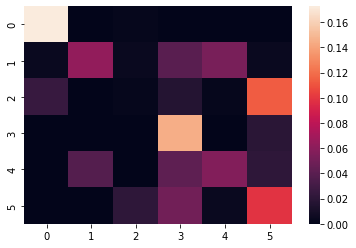

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(val_input)
y_pred = np.argmax(y_pred, axis=3)
y_pred = y_pred.reshape(val_input.shape[0],)

sns.heatmap(confusion_matrix(y,y_pred, normalize = 'all'), fmt='g')

#Test specgram

In [30]:
test_input = specgram_generator2(test_windows)
predictions = model.predict(test_input)
p = np.argmax(predictions, axis=3)
p = p.reshape(672,)

r = pd.DataFrame(columns = ['Id', 'Category'])
for i in range(0,len(p)):
  r.loc[i,'Id']=i
  r.loc[i,'Category']=p[i]+1

r

(672, 129, 8, 8)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


,Id,Category
0,0,6
1,1,3
2,2,5
3,3,6
4,4,4
...,...,...
667,667,2
668,668,5
669,669,2
670,670,5


In [31]:
r.to_csv(index=False)

'Id,Category\n0,6\n1,3\n2,5\n3,6\n4,4\n5,4\n6,6\n7,2\n8,6\n9,2\n10,4\n11,1\n12,4\n13,5\n14,6\n15,1\n16,4\n17,4\n18,6\n19,6\n20,4\n21,4\n22,1\n23,4\n24,5\n25,5\n26,6\n27,5\n28,4\n29,2\n30,4\n31,6\n32,6\n33,3\n34,6\n35,4\n36,2\n37,5\n38,3\n39,2\n40,4\n41,4\n42,6\n43,5\n44,2\n45,4\n46,4\n47,5\n48,6\n49,6\n50,1\n51,2\n52,1\n53,6\n54,5\n55,3\n56,6\n57,6\n58,6\n59,2\n60,4\n61,4\n62,4\n63,4\n64,4\n65,2\n66,2\n67,6\n68,5\n69,4\n70,1\n71,2\n72,4\n73,4\n74,4\n75,2\n76,5\n77,5\n78,5\n79,6\n80,1\n81,4\n82,6\n83,5\n84,6\n85,5\n86,4\n87,4\n88,6\n89,2\n90,6\n91,5\n92,4\n93,2\n94,4\n95,1\n96,5\n97,6\n98,2\n99,3\n100,4\n101,3\n102,5\n103,4\n104,5\n105,3\n106,5\n107,2\n108,1\n109,5\n110,5\n111,6\n112,5\n113,5\n114,2\n115,4\n116,4\n117,5\n118,5\n119,6\n120,6\n121,2\n122,4\n123,3\n124,2\n125,4\n126,5\n127,5\n128,5\n129,5\n130,3\n131,5\n132,4\n133,4\n134,2\n135,5\n136,6\n137,2\n138,6\n139,3\n140,4\n141,5\n142,5\n143,5\n144,5\n145,6\n146,4\n147,5\n148,4\n149,5\n150,4\n151,4\n152,1\n153,6\n154,1\n155,6\n156,

In [32]:
compression_opts = dict(method='zip',archive_name='out.csv')  

r.to_csv('out.zip', index=False, compression=compression_opts)  

#Ventanas sin procesar



In [33]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from scipy.spatial import distance

import torchvision
import torchvision.transforms as transforms

#create model
model2 = Sequential()

model2.add(layers.Conv2D(filters=32, kernel_size=(1, 4), activation="relu", input_shape=(1,800 ,8), data_format = "channels_last"))
model2.add(layers.Dropout(0.15))

model2.add(layers.ZeroPadding2D(padding=(1, 1)))
model2.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model2.add(layers.Dropout(0.15))
model2.add(layers.MaxPooling2D(pool_size=(1, 3), padding='valid'))

model2.add(layers.ZeroPadding2D(padding=(2, 2)))
model2.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model2.add(layers.Dropout(0.15))
model2.add(layers.MaxPooling2D(pool_size=(1, 1), padding='valid'))

model2.add(layers.ZeroPadding2D(padding=(2, 0)))
model2.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model2.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model2.add(layers.Dropout(0.15))

model2.add(layers.Conv2D(filters=64, kernel_size=(1, 5), activation="relu"))
model2.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model2.add(layers.Dropout(0.15))


model2.add(layers.Conv2D(filters=64, kernel_size=(1, 3), activation="relu"))
model2.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model2.add(layers.Dropout(0.15))

model2.add(layers.Conv2D(filters=6, kernel_size=(1, 1), activation="softmax"))
#model2.add(layers.Dense(6, activation="softmax"))
model2.summary()

#compile model using accuracy to measure model performance
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 1, 797, 32)        1056      
                                                                 
 dropout_4 (Dropout)         (None, 1, 797, 32)        0         
                                                                 
 zero_padding2d_3 (ZeroPaddi  (None, 3, 799, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_6 (Conv2D)           (None, 1, 797, 32)        9248      
                                                                 
 dropout_5 (Dropout)         (None, 1, 797, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 265, 32)       0         
 2D)                                                  

In [34]:
train_ex = np.expand_dims(train_windows, axis=0)
train_windows_r = train_windows.reshape(len(train_windows), 1, 800,8)
val_windows_r = val_windows.reshape(len(val_windows), 1, 800,8)

In [35]:
# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
print(train_windows.shape)
print(np.array(train_classes).shape)
history2 = model2.fit(train_windows_r, np.array(train_classes).reshape(len(train_classes), 1, 1,6), validation_data=(val_windows_r, np.array(val_classes).reshape(len(val_classes), 1, 1,6)),batch_size=batch_size, epochs=25)

Fit on NumPy data
(2193, 800, 8)
(2193, 1, 6)
Epoch 1/25
35/35 [==============================] - 2s 30ms/step - loss: 1.6949 - accuracy: 0.2585 - val_loss: 1.5935 - val_accuracy: 0.4000
Epoch 2/25
35/35 [==============================] - 1s 16ms/step - loss: 1.4402 - accuracy: 0.3926 - val_loss: 1.2149 - val_accuracy: 0.4211
Epoch 3/25
35/35 [==============================] - 1s 16ms/step - loss: 1.0845 - accuracy: 0.5217 - val_loss: 0.8678 - val_accuracy: 0.5937
Epoch 4/25
35/35 [==============================] - 1s 16ms/step - loss: 0.8660 - accuracy: 0.6252 - val_loss: 0.8183 - val_accuracy: 0.6526
Epoch 5/25
35/35 [==============================] - 1s 16ms/step - loss: 0.7552 - accuracy: 0.6899 - val_loss: 0.6632 - val_accuracy: 0.7095
Epoch 6/25
35/35 [==============================] - 1s 17ms/step - loss: 0.6779 - accuracy: 0.7228 - val_loss: 0.8244 - val_accuracy: 0.6674
Epoch 7/25
35/35 [==============================] - 1s 24ms/step - loss: 0.6391 - accuracy: 0.7451 - val_los

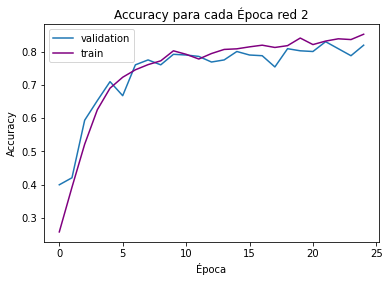

In [36]:
plt.plot(range(0,len(history2.history['val_accuracy'])), history2.history['val_accuracy'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.title("Accuracy para cada Época red 2")
plt.plot(range(0,len(history2.history['accuracy'])), history2.history['accuracy'], label = "train", color = 'purple')
plt.legend()



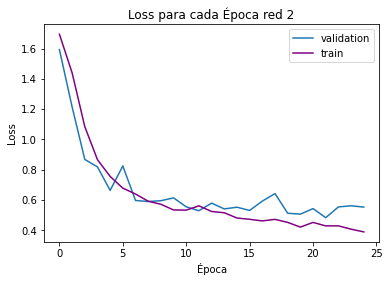

In [37]:
plt.plot(range(0,len(history2.history['val_loss'])), history2.history['val_loss'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss para cada Época red 2")
plt.plot(range(0,len(history2.history['loss'])), history2.history['loss'], label = "train", color = 'purple')
plt.legend()

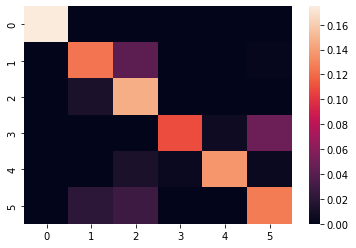

In [38]:
y_pred = model2.predict(val_windows_r)
y_pred = np.argmax(y_pred, axis=3)
y_pred = y_pred.reshape(val_windows_r.shape[0],)

sns.heatmap(confusion_matrix(y,y_pred, normalize = 'all'), fmt='g')

In [39]:
#test_input = specgram_generator2(test_windows)
test_input = test_windows.reshape(len(test_windows), 1, 800,8)
predictions = model2.predict(test_input)
p = np.argmax(predictions, axis=3)
print(p.shape)
p = p.reshape(p.shape[0],)

r = pd.DataFrame(columns = ['Id', 'Category'])
for i in range(0,len(p)):
  r.loc[i,'Id']=i
  r.loc[i,'Category']=p[i]+1

r

(672, 1, 1)


,Id,Category
0,0,2
1,1,3
2,2,2
3,3,6
4,4,3
...,...,...
667,667,2
668,668,5
669,669,2
670,670,2


In [40]:
compression_opts = dict(method='zip',archive_name='window.csv')  

r.to_csv('window.zip', index=False, compression=compression_opts)  

# Dense con specgrams


In [41]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from scipy.spatial import distance

import torchvision
import torchvision.transforms as transforms

#create model
model3 = Sequential()

model3.add(layers.Conv2D(filters=32, kernel_size=(1, 4), activation="relu", input_shape=(129, 8 ,8), data_format="channels_last"))
model3.add(layers.Dropout(0.15))

model3.add(layers.ZeroPadding2D(padding=(1, 1)))
model3.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model3.add(layers.Dropout(0.15))
model3.add(layers.MaxPooling2D(pool_size=(4, 3), padding='valid'))

model3.add(layers.ZeroPadding2D(padding=(2, 2)))
model3.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model3.add(layers.Dropout(0.15))
model3.add(layers.MaxPooling2D(pool_size=(5, 1), padding='valid'))

model3.add(layers.ZeroPadding2D(padding=(2, 0)))
model3.add(layers.Conv2D(filters=64, kernel_size=(5, 1), activation="relu"))
model3.add(layers.MaxPooling2D(pool_size=(5, 1), padding='valid'))
model3.add(layers.Dropout(0.15))


model3.add(layers.Dense(6, activation='softmax'))



#compile model using accuracy to measure model performance
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
print(train_input.shape)
print(np.array(train_classes).shape)
history3 = model3.fit(train_input, np.array(train_classes).reshape(len(train_classes), 1, 1, 6), validation_data=(val_input, np.array(val_classes).reshape(len(val_classes), 1, 1, 6)),batch_size=batch_size, epochs=35)

Fit on NumPy data
(2193, 129, 8, 8)
(2193, 1, 6)
Epoch 1/35
35/35 [==============================] - 1s 19ms/step - loss: 1.7171 - accuracy: 0.2084 - val_loss: 1.6525 - val_accuracy: 0.3474
Epoch 2/35
35/35 [==============================] - 0s 11ms/step - loss: 1.5710 - accuracy: 0.4063 - val_loss: 1.5447 - val_accuracy: 0.3958
Epoch 3/35
35/35 [==============================] - 0s 11ms/step - loss: 1.4213 - accuracy: 0.4227 - val_loss: 1.3920 - val_accuracy: 0.4421
Epoch 4/35
35/35 [==============================] - 0s 12ms/step - loss: 1.3261 - accuracy: 0.4314 - val_loss: 1.3797 - val_accuracy: 0.3811
Epoch 5/35
35/35 [==============================] - 0s 12ms/step - loss: 1.2751 - accuracy: 0.4592 - val_loss: 1.2858 - val_accuracy: 0.4400
Epoch 6/35
35/35 [==============================] - 0s 12ms/step - loss: 1.2410 - accuracy: 0.4514 - val_loss: 1.2914 - val_accuracy: 0.4147
Epoch 7/35
35/35 [==============================] - 0s 12ms/step - loss: 1.2307 - accuracy: 0.4592 - val_

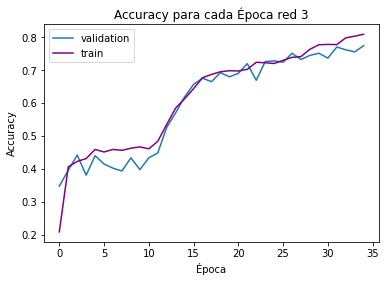

In [43]:
plt.plot(range(0,len(history3.history['val_accuracy'])), history3.history['val_accuracy'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.title("Accuracy para cada Época red 3")
plt.plot(range(0,len(history3.history['accuracy'])), history3.history['accuracy'], label = "train", color = 'purple')
plt.legend()

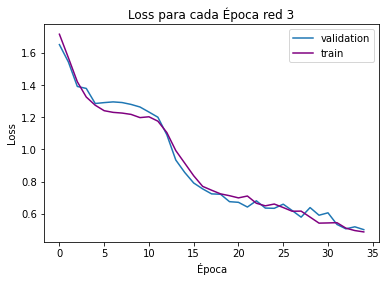

In [44]:
plt.plot(range(0,len(history3.history['val_loss'])), history3.history['val_loss'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss para cada Época red 3")
plt.plot(range(0,len(history3.history['loss'])), history3.history['loss'], label = "train", color = 'purple')
plt.legend()

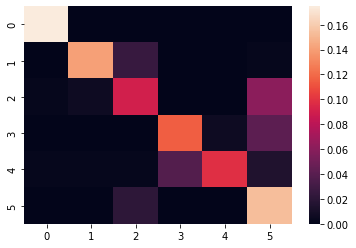

In [45]:
y_pred = model3.predict(val_input)
y_pred = np.argmax(y_pred, axis=3)
y_pred = y_pred.reshape(val_input.shape[0],)

sns.heatmap(confusion_matrix(y,y_pred, normalize = 'all'), fmt='g')

In [46]:
test_input = specgram_generator2(test_windows)
predictions = model3.predict(test_input)
p = np.argmax(predictions, axis=3)
p = p.reshape(672,)

r = pd.DataFrame(columns = ['Id', 'Category'])
for i in range(0,len(p)):
  r.loc[i,'Id']=i
  r.loc[i,'Category']=p[i]+1

r

(672, 129, 8, 8)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: ComplexWarning: Casting complex values to real discards the imaginary part


,Id,Category
0,0,6
1,1,3
2,2,2
3,3,6
4,4,6
...,...,...
667,667,6
668,668,5
669,669,2
670,670,2


In [47]:
compression_opts = dict(method='zip',archive_name='dense.csv')  

r.to_csv('dense.zip', index=False, compression=compression_opts)  

# Dense de ventanas

In [48]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from scipy.spatial import distance

import torchvision
import torchvision.transforms as transforms

model4 = Sequential()

model4.add(layers.Conv2D(filters=32, kernel_size=(1, 4), activation="relu", input_shape=(1,800 ,8), data_format = "channels_last"))
model4.add(layers.Dropout(0.15))

model4.add(layers.ZeroPadding2D(padding=(1, 1)))
model4.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model4.add(layers.Dropout(0.15))
model4.add(layers.MaxPooling2D(pool_size=(1, 3), padding='valid'))

model4.add(layers.ZeroPadding2D(padding=(2, 2)))
model4.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model4.add(layers.Dropout(0.15))
model4.add(layers.MaxPooling2D(pool_size=(1, 1), padding='valid'))

model4.add(layers.ZeroPadding2D(padding=(2, 0)))
model4.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model4.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model4.add(layers.Dropout(0.15))

model4.add(layers.Conv2D(filters=64, kernel_size=(1, 5), activation="relu"))
model4.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model4.add(layers.Dropout(0.15))


model4.add(layers.Conv2D(filters=64, kernel_size=(1, 3), activation="relu"))
model4.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model4.add(layers.Dropout(0.15))



model4.add(layers.Dense(6, activation='softmax'))



#compile model using accuracy to measure model performance
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
train_ex = np.expand_dims(train_windows, axis=0)
train_windows_r = train_windows.reshape(len(train_windows), 1, 800,8)
val_windows_r = val_windows.reshape(len(val_windows), 1, 800,8)

In [50]:
# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
print(train_windows.shape)
print(np.array(train_classes).shape)
history4 = model4.fit(train_windows_r, np.array(train_classes).reshape(len(train_classes), 1, 1,6), validation_data=(val_windows_r, np.array(val_classes).reshape(len(val_classes), 1, 1,6)),batch_size=batch_size, epochs=30)

Fit on NumPy data
(2193, 800, 8)
(2193, 1, 6)
Epoch 1/30
35/35 [==============================] - 2s 26ms/step - loss: 1.6831 - accuracy: 0.2791 - val_loss: 1.5716 - val_accuracy: 0.3832
Epoch 2/30
35/35 [==============================] - 1s 17ms/step - loss: 1.3296 - accuracy: 0.4414 - val_loss: 1.1186 - val_accuracy: 0.5242
Epoch 3/30
35/35 [==============================] - 1s 17ms/step - loss: 1.0324 - accuracy: 0.5600 - val_loss: 0.9159 - val_accuracy: 0.5958
Epoch 4/30
35/35 [==============================] - 1s 17ms/step - loss: 0.8650 - accuracy: 0.6347 - val_loss: 0.8095 - val_accuracy: 0.6547
Epoch 5/30
35/35 [==============================] - 1s 17ms/step - loss: 0.7384 - accuracy: 0.7041 - val_loss: 0.7046 - val_accuracy: 0.7263
Epoch 6/30
35/35 [==============================] - 1s 17ms/step - loss: 0.6830 - accuracy: 0.7305 - val_loss: 0.6286 - val_accuracy: 0.7705
Epoch 7/30
35/35 [==============================] - 1s 17ms/step - loss: 0.6443 - accuracy: 0.7392 - val_los

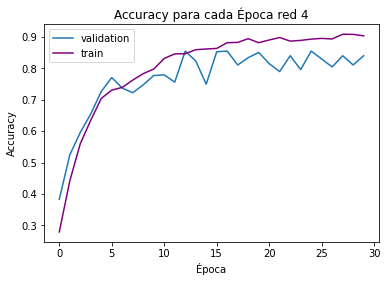

In [51]:
plt.plot(range(0,len(history4.history['val_accuracy'])), history4.history['val_accuracy'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.title("Accuracy para cada Época red 4")
plt.plot(range(0,len(history4.history['accuracy'])), history4.history['accuracy'], label = "train", color = 'purple')
plt.legend()


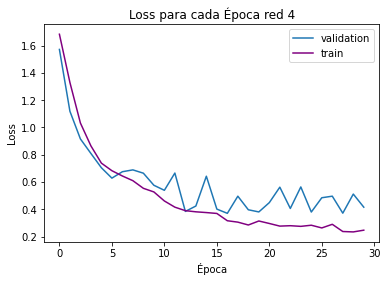

In [52]:
plt.plot(range(0,len(history4.history['val_loss'])), history4.history['val_loss'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss para cada Época red 4")
plt.plot(range(0,len(history4.history['loss'])), history4.history['loss'], label = "train", color = 'purple')
plt.legend()

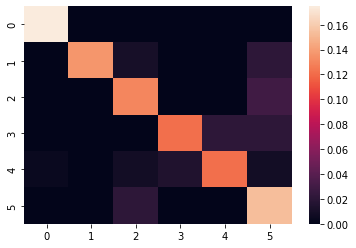

In [53]:
y_pred = model4.predict(val_windows_r)
y_pred = np.argmax(y_pred, axis=3)
y_pred = y_pred.reshape(val_windows_r.shape[0],)

sns.heatmap(confusion_matrix(y,y_pred, normalize = 'all'), fmt='g')

In [54]:
#test_input = specgram_generator2(test_windows)
test_input = test_windows.reshape(len(test_windows), 1, 800,8)
predictions = model4.predict(test_input)
p = np.argmax(predictions, axis=3)
print(p.shape)
p = p.reshape(p.shape[0],)

r = pd.DataFrame(columns = ['Id', 'Category'])
for i in range(0,len(p)):
  r.loc[i,'Id']=i
  r.loc[i,'Category']=p[i]+1

r

(672, 1, 1)


,Id,Category
0,0,2
1,1,2
2,2,2
3,3,6
4,4,2
...,...,...
667,667,2
668,668,5
669,669,2
670,670,2


In [55]:
compression_opts = dict(method='zip',archive_name='dense-window.csv')  

r.to_csv('dense-window.zip', index=False, compression=compression_opts)  

# Eliminación de señales

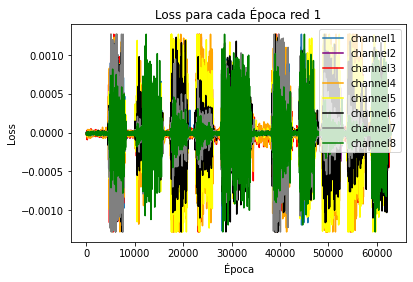

In [56]:
x = subject_df1['time']
y1 = subject_df1['channel1']
y2 = subject_df1['channel2']
y3 = subject_df1['channel3']
y4 = subject_df1['channel4']
y5 = subject_df1['channel5']
y6 = subject_df1['channel6']
y7 = subject_df1['channel7']
y8 = subject_df1['channel8']

plt.plot(x, y1, label = "channel1")
plt.plot(x, y2, label = "channel2", color = 'purple')
plt.plot(x, y3, label = "channel3", color = 'red')
plt.plot(x, y4, label = "channel4", color = 'orange')
plt.plot(x, y5, label = "channel5", color = 'yellow')
plt.plot(x, y6, label = "channel6", color = 'black')
plt.plot(x, y7, label = "channel7", color = 'gray')
plt.plot(x, y8, label = "channel8", color = 'green')

plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss para cada Época red 1")
plt.legend()

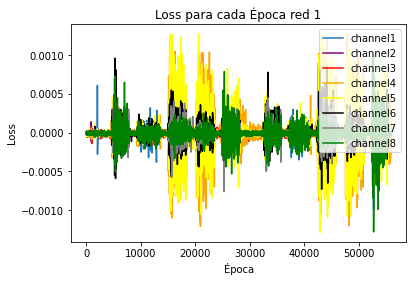

In [57]:
x = subjects[0]['time']
y1 = subjects[0]['channel1']
y2 = subjects[0]['channel2']
y3 = subjects[0]['channel3']
y4 = subjects[0]['channel4']
y5 = subjects[0]['channel5']
y6 = subjects[0]['channel6']
y7 = subjects[0]['channel7']
y8 = subjects[0]['channel8']

plt.plot(x, y1, label = "channel1")
plt.plot(x, y2, label = "channel2", color = 'purple')
plt.plot(x, y3, label = "channel3", color = 'red')
plt.plot(x, y4, label = "channel4", color = 'orange')
plt.plot(x, y5, label = "channel5", color = 'yellow')
plt.plot(x, y6, label = "channel6", color = 'black')
plt.plot(x, y7, label = "channel7", color = 'gray')
plt.plot(x, y8, label = "channel8", color = 'green')

plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss para cada Época red 1")
plt.legend()

## Menos chanel 1


In [58]:
def train_window_generator_matrix_2(df, w_size, w_step, w_channel):
  #i ----> fila
  #j ----> columna
  id=0
  time = 0
  w_train_df = np.zeros([int(len(df)/800*4), 800, 7])
  r_train_df = []
  condition = True

  while condition:
    if time + 800 < len(df):
      first = df.loc[time]['class']
      last = df.loc[time+799]['class']

      if first  == last: 
        #Si todos los elementos de la ventana son de la misma clase se hace la ventana
        #sino no se hace nada y se sigue con el ciclo.
        for channel in range(1, 9):
          if channel != w_channel:
            window = df.loc[time:time+799]['channel'+str(channel)].to_numpy()
            for i in range(0,len(window)):
              if channel < w_channel:
                w_train_df[id][i][channel-1] = window[i]
              else:
                w_train_df[id][i][channel-2] = window[i]
              w_train_df[id][i][channel-2] = window[i]
        id += 1
        class_ECO = np.zeros([1,6])
        class_ECO[0][int(first-1)] = 1
        r_train_df.append(class_ECO)

      time += w_step
    else:
      condition = False

  w_train_df = np.delete(w_train_df, range(id , len(w_train_df)), 0)
  return w_train_df, r_train_df

In [59]:
def specgram_generator3(df):
  input_df = np.zeros([len(df), 129, 8, 8], dtype='float')
  print(input_df.shape)
  for i in range(0, len(df)):
    x0 = df[i, :, 0]
    x1 = df[i, :, 1]
    x2 = df[i, :, 2]
    x3 = df[i, :, 3]
    x4 = df[i, :, 4]
    x5 = df[i, :, 5]
    x6 = df[i, :, 6]



    f0, t0, Sxx0 = signal.stft(x0)
    f1, t1, Sxx1 = signal.stft(x1)
    f2, t2, Sxx2 = signal.stft(x2)
    f3, t3, Sxx3 = signal.stft(x3)
    f4, t4, Sxx4 = signal.stft(x4)
    f5, t5, Sxx5 = signal.stft(x5)
    f6, t6, Sxx6 = signal.stft(x6)

    spec_list = [Sxx0, Sxx1, Sxx2, Sxx3, Sxx4, Sxx5, Sxx6]

    for spec_i in range(0, len(spec_list)) :
      #norms = np.linalg.norm(spec_list[spec_i])
      input_df[i, : , : , spec_i] = spec_list[spec_i]

  return input_df


In [60]:
train_df_f = train_df.drop(columns=['channel1'])
val_df_f = val_df.drop(columns=['channel1'])
train_windows, train_classes = train_window_generator_matrix_2(train_df_f, 800, 250,1)
val_windows, val_classes = train_window_generator_matrix_2(val_df_f, 800, 250,1)

In [61]:
#create model
model6 = Sequential()

model6.add(layers.Conv2D(filters=32, kernel_size=(1, 4), activation="relu", input_shape=(1,800 ,7), data_format = "channels_last"))
model6.add(layers.Dropout(0.15))

model6.add(layers.ZeroPadding2D(padding=(1, 1)))
model6.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model6.add(layers.Dropout(0.15))
model6.add(layers.MaxPooling2D(pool_size=(1, 3), padding='valid'))

model6.add(layers.ZeroPadding2D(padding=(2, 2)))
model6.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model6.add(layers.Dropout(0.15))
model6.add(layers.MaxPooling2D(pool_size=(1, 1), padding='valid'))

model6.add(layers.ZeroPadding2D(padding=(2, 0)))
model6.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model6.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model6.add(layers.Dropout(0.15))

model6.add(layers.Conv2D(filters=64, kernel_size=(1, 5), activation="relu"))
model6.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model6.add(layers.Dropout(0.15))


model6.add(layers.Conv2D(filters=64, kernel_size=(1, 3), activation="relu"))
model6.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model6.add(layers.Dropout(0.15))


model6.add(layers.Conv2D(filters=6, kernel_size=(1, 1), activation="softmax"))
#model2.add(layers.Dense(6, activation="softmax"))
model6.summary()

#compile model using accuracy to measure model performance
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 1, 797, 32)        928       
                                                                 
 dropout_20 (Dropout)        (None, 1, 797, 32)        0         
                                                                 
 zero_padding2d_12 (ZeroPadd  (None, 3, 799, 32)       0         
 ing2D)                                                          
                                                                 
 conv2d_23 (Conv2D)          (None, 1, 797, 32)        9248      
                                                                 
 dropout_21 (Dropout)        (None, 1, 797, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 1, 265, 32)       0         
 g2D)                                                 

In [62]:
train_ex = np.expand_dims(train_windows, axis=0)
train_windows_r = train_windows.reshape(len(train_windows), 1, 800,7)
val_windows_r = val_windows.reshape(len(val_windows), 1, 800,7)

In [63]:
# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
print(train_windows.shape)
print(np.array(train_classes).shape)
history6 = model6.fit(train_windows_r, np.array(train_classes).reshape(len(train_classes), 1, 1,6), validation_data=(val_windows_r, np.array(val_classes).reshape(len(val_classes), 1, 1,6)),batch_size=batch_size, epochs=25)

Fit on NumPy data
(2193, 800, 7)
(2193, 1, 6)
Epoch 1/25
35/35 [==============================] - 2s 25ms/step - loss: 1.6752 - accuracy: 0.2964 - val_loss: 1.5849 - val_accuracy: 0.4168
Epoch 2/25
35/35 [==============================] - 1s 16ms/step - loss: 1.4007 - accuracy: 0.4081 - val_loss: 1.3218 - val_accuracy: 0.4674
Epoch 3/25
35/35 [==============================] - 1s 18ms/step - loss: 1.1365 - accuracy: 0.5052 - val_loss: 0.8745 - val_accuracy: 0.6316
Epoch 4/25
35/35 [==============================] - 1s 17ms/step - loss: 0.9044 - accuracy: 0.6074 - val_loss: 0.7052 - val_accuracy: 0.7095
Epoch 5/25
35/35 [==============================] - 1s 16ms/step - loss: 0.7744 - accuracy: 0.6790 - val_loss: 0.7201 - val_accuracy: 0.6737
Epoch 6/25
35/35 [==============================] - 1s 16ms/step - loss: 0.6679 - accuracy: 0.7337 - val_loss: 0.4962 - val_accuracy: 0.8063
Epoch 7/25
35/35 [==============================] - 1s 16ms/step - loss: 0.5816 - accuracy: 0.7711 - val_los

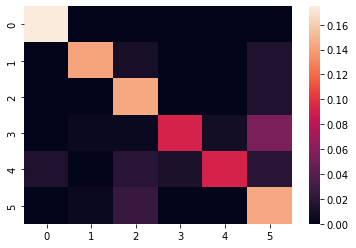

In [64]:
y_pred = model6.predict(val_windows_r)
y_pred = np.argmax(y_pred, axis=3)
y_pred = y_pred.reshape(val_windows_r.shape[0],)

sns.heatmap(confusion_matrix(y,y_pred, normalize = 'all'), fmt='g')

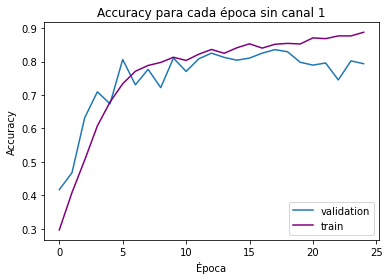

In [65]:
plt.plot(range(0,len(history6.history['val_accuracy'])), history6.history['val_accuracy'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.title("Accuracy para cada época sin canal 1")
plt.plot(range(0,len(history6.history['accuracy'])), history6.history['accuracy'], label = "train", color = 'purple')
plt.legend()


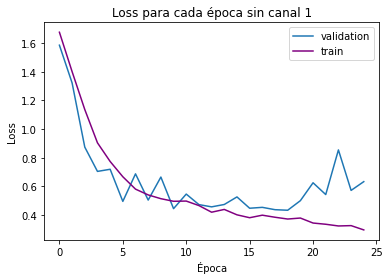

In [66]:
plt.plot(range(0,len(history6.history['val_loss'])), history6.history['val_loss'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss para cada época sin canal 1")
plt.plot(range(0,len(history6.history['loss'])), history6.history['loss'], label = "train", color = 'purple')
plt.legend()

## Sin canal 2

In [67]:
train_df_f = train_df.drop(columns=['channel2'])
val_df_f = val_df.drop(columns=['channel2'])
train_windows, train_classes = train_window_generator_matrix_2(train_df_f, 800, 250,2)
val_windows, val_classes = train_window_generator_matrix_2(val_df_f, 800, 250,2)

In [68]:
#create model
model7 = Sequential()

model7.add(layers.Conv2D(filters=32, kernel_size=(1, 4), activation="relu", input_shape=(1,800 ,7), data_format = "channels_last"))
model7.add(layers.Dropout(0.15))

model7.add(layers.ZeroPadding2D(padding=(1, 1)))
model7.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model7.add(layers.Dropout(0.15))
model7.add(layers.MaxPooling2D(pool_size=(1, 3), padding='valid'))

model7.add(layers.ZeroPadding2D(padding=(2, 2)))
model7.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model7.add(layers.Dropout(0.15))
model7.add(layers.MaxPooling2D(pool_size=(1, 1), padding='valid'))

model7.add(layers.ZeroPadding2D(padding=(2, 0)))
model7.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model7.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model7.add(layers.Dropout(0.15))

model7.add(layers.Conv2D(filters=64, kernel_size=(1, 5), activation="relu"))
model7.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model7.add(layers.Dropout(0.15))


model7.add(layers.Conv2D(filters=64, kernel_size=(1, 3), activation="relu"))
model7.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model7.add(layers.Dropout(0.15))


model7.add(layers.Conv2D(filters=6, kernel_size=(1, 1), activation="softmax"))
#model2.add(layers.Dense(6, activation="softmax"))
model7.summary()

#compile model using accuracy to measure model performance
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 1, 797, 32)        928       
                                                                 
 dropout_26 (Dropout)        (None, 1, 797, 32)        0         
                                                                 
 zero_padding2d_15 (ZeroPadd  (None, 3, 799, 32)       0         
 ing2D)                                                          
                                                                 
 conv2d_30 (Conv2D)          (None, 1, 797, 32)        9248      
                                                                 
 dropout_27 (Dropout)        (None, 1, 797, 32)        0         
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 1, 265, 32)       0         
 g2D)                                                 

In [69]:
train_ex = np.expand_dims(train_windows, axis=0)
train_windows_r = train_windows.reshape(len(train_windows), 1, 800,7)
val_windows_r = val_windows.reshape(len(val_windows), 1, 800,7)

In [70]:
# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
print(train_windows.shape)
print(np.array(train_classes).shape)
history7 = model7.fit(train_windows_r, np.array(train_classes).reshape(len(train_classes), 1, 1,6), validation_data=(val_windows_r, np.array(val_classes).reshape(len(val_classes), 1, 1,6)),batch_size=batch_size, epochs=25)

Fit on NumPy data
(2193, 800, 7)
(2193, 1, 6)
Epoch 1/25
35/35 [==============================] - 2s 25ms/step - loss: 1.6559 - accuracy: 0.2371 - val_loss: 1.5330 - val_accuracy: 0.4337
Epoch 2/25
35/35 [==============================] - 1s 16ms/step - loss: 1.3071 - accuracy: 0.4651 - val_loss: 1.0943 - val_accuracy: 0.5263
Epoch 3/25
35/35 [==============================] - 1s 17ms/step - loss: 1.0083 - accuracy: 0.5837 - val_loss: 0.8913 - val_accuracy: 0.6358
Epoch 4/25
35/35 [==============================] - 1s 17ms/step - loss: 0.8797 - accuracy: 0.6238 - val_loss: 0.7871 - val_accuracy: 0.6568
Epoch 5/25
35/35 [==============================] - 1s 16ms/step - loss: 0.7787 - accuracy: 0.6758 - val_loss: 0.7121 - val_accuracy: 0.7053
Epoch 6/25
35/35 [==============================] - 1s 17ms/step - loss: 0.6916 - accuracy: 0.7328 - val_loss: 0.6184 - val_accuracy: 0.7537
Epoch 7/25
35/35 [==============================] - 1s 16ms/step - loss: 0.6190 - accuracy: 0.7674 - val_los

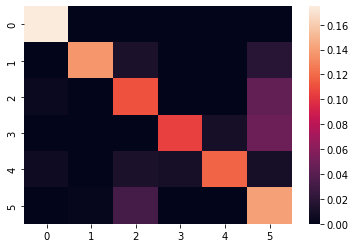

In [71]:
y_pred = model7.predict(val_windows_r)
y_pred = np.argmax(y_pred, axis=3)
y_pred = y_pred.reshape(val_windows_r.shape[0],)

sns.heatmap(confusion_matrix(y,y_pred, normalize = 'all'), fmt='g')

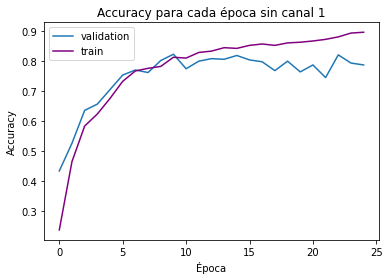

In [72]:
plt.plot(range(0,len(history7.history['val_accuracy'])), history7.history['val_accuracy'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.title("Accuracy para cada época sin canal 1")
plt.plot(range(0,len(history7.history['accuracy'])), history7.history['accuracy'], label = "train", color = 'purple')
plt.legend()


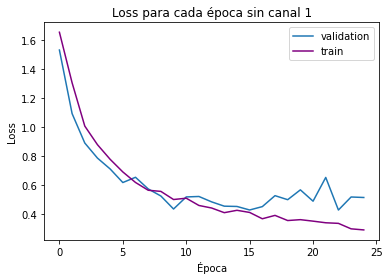

In [73]:
plt.plot(range(0,len(history7.history['val_loss'])), history7.history['val_loss'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss para cada época sin canal 1")
plt.plot(range(0,len(history7.history['loss'])), history7.history['loss'], label = "train", color = 'purple')
plt.legend()

## Sin canal 3

In [74]:
train_df_f = train_df.drop(columns=['channel3'])
val_df_f = val_df.drop(columns=['channel3'])
train_windows, train_classes = train_window_generator_matrix_2(train_df_f, 800, 250,3)
val_windows, val_classes = train_window_generator_matrix_2(val_df_f, 800, 250,3)

In [75]:
#create model
model8 = Sequential()

model8.add(layers.Conv2D(filters=32, kernel_size=(1, 4), activation="relu", input_shape=(1,800 ,7), data_format = "channels_last"))
model8.add(layers.Dropout(0.15))

model8.add(layers.ZeroPadding2D(padding=(1, 1)))
model8.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model8.add(layers.Dropout(0.15))
model8.add(layers.MaxPooling2D(pool_size=(1, 3), padding='valid'))

model8.add(layers.ZeroPadding2D(padding=(2, 2)))
model8.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model8.add(layers.Dropout(0.15))
model8.add(layers.MaxPooling2D(pool_size=(1, 1), padding='valid'))

model8.add(layers.ZeroPadding2D(padding=(2, 0)))
model8.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model8.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model8.add(layers.Dropout(0.15))

model8.add(layers.Conv2D(filters=64, kernel_size=(1, 5), activation="relu"))
model8.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model8.add(layers.Dropout(0.15))


model8.add(layers.Conv2D(filters=64, kernel_size=(1, 3), activation="relu"))
model8.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model8.add(layers.Dropout(0.15))


model8.add(layers.Conv2D(filters=6, kernel_size=(1, 1), activation="softmax"))
#model2.add(layers.Dense(6, activation="softmax"))
model8.summary()

#compile model using accuracy to measure model performance
model8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 1, 797, 32)        928       
                                                                 
 dropout_32 (Dropout)        (None, 1, 797, 32)        0         
                                                                 
 zero_padding2d_18 (ZeroPadd  (None, 3, 799, 32)       0         
 ing2D)                                                          
                                                                 
 conv2d_37 (Conv2D)          (None, 1, 797, 32)        9248      
                                                                 
 dropout_33 (Dropout)        (None, 1, 797, 32)        0         
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 1, 265, 32)       0         
 g2D)                                                 

In [76]:
train_ex = np.expand_dims(train_windows, axis=0)
train_windows_r = train_windows.reshape(len(train_windows), 1, 800,7)
val_windows_r = val_windows.reshape(len(val_windows), 1, 800,7)

In [77]:
# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
print(train_windows.shape)
print(np.array(train_classes).shape)
history8 = model8.fit(train_windows_r, np.array(train_classes).reshape(len(train_classes), 1, 1,6), validation_data=(val_windows_r, np.array(val_classes).reshape(len(val_classes), 1, 1,6)),batch_size=batch_size, epochs=25)

Fit on NumPy data
(2193, 800, 7)
(2193, 1, 6)
Epoch 1/25
35/35 [==============================] - 2s 24ms/step - loss: 1.6875 - accuracy: 0.2677 - val_loss: 1.5650 - val_accuracy: 0.4063
Epoch 2/25
35/35 [==============================] - 1s 16ms/step - loss: 1.4316 - accuracy: 0.3999 - val_loss: 1.2830 - val_accuracy: 0.4989
Epoch 3/25
35/35 [==============================] - 1s 17ms/step - loss: 1.1082 - accuracy: 0.5135 - val_loss: 0.8746 - val_accuracy: 0.6400
Epoch 4/25
35/35 [==============================] - 1s 16ms/step - loss: 0.8497 - accuracy: 0.6644 - val_loss: 0.7522 - val_accuracy: 0.6695
Epoch 5/25
35/35 [==============================] - 1s 19ms/step - loss: 0.7273 - accuracy: 0.7091 - val_loss: 0.6313 - val_accuracy: 0.7474
Epoch 6/25
35/35 [==============================] - 1s 22ms/step - loss: 0.6608 - accuracy: 0.7446 - val_loss: 0.6729 - val_accuracy: 0.7326
Epoch 7/25
35/35 [==============================] - 1s 23ms/step - loss: 0.6027 - accuracy: 0.7624 - val_los

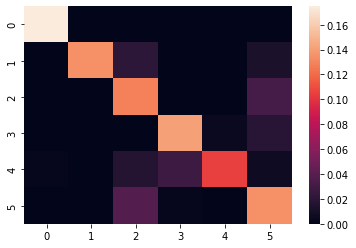

In [78]:
y_pred = model8.predict(val_windows_r)
y_pred = np.argmax(y_pred, axis=3)
y_pred = y_pred.reshape(val_windows_r.shape[0],)

sns.heatmap(confusion_matrix(y,y_pred, normalize = 'all'), fmt='g')

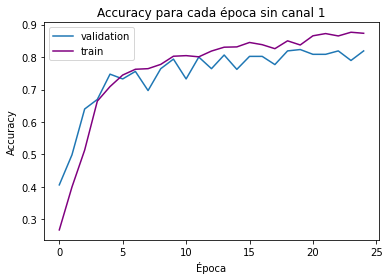

In [79]:
plt.plot(range(0,len(history8.history['val_accuracy'])), history8.history['val_accuracy'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.title("Accuracy para cada época sin canal 1")
plt.plot(range(0,len(history8.history['accuracy'])), history8.history['accuracy'], label = "train", color = 'purple')
plt.legend()


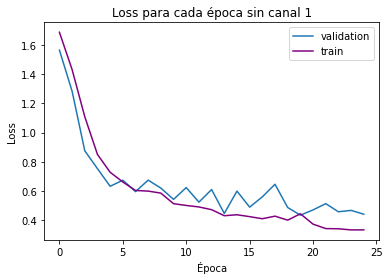

In [80]:
plt.plot(range(0,len(history8.history['val_loss'])), history8.history['val_loss'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss para cada época sin canal 1")
plt.plot(range(0,len(history8.history['loss'])), history8.history['loss'], label = "train", color = 'purple')
plt.legend()

## Sin canal 4

In [81]:
train_df_f = train_df.drop(columns=['channel4'])
val_df_f = val_df.drop(columns=['channel4'])
train_windows, train_classes = train_window_generator_matrix_2(train_df_f, 800, 250,4)
val_windows, val_classes = train_window_generator_matrix_2(val_df_f, 800, 250,4)

In [82]:
#create model
model9 = Sequential()

model9.add(layers.Conv2D(filters=32, kernel_size=(1, 4), activation="relu", input_shape=(1,800 ,7), data_format = "channels_last"))
model9.add(layers.Dropout(0.15))

model9.add(layers.ZeroPadding2D(padding=(1, 1)))
model9.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model9.add(layers.Dropout(0.15))
model9.add(layers.MaxPooling2D(pool_size=(1, 3), padding='valid'))

model9.add(layers.ZeroPadding2D(padding=(2, 2)))
model9.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model9.add(layers.Dropout(0.15))
model9.add(layers.MaxPooling2D(pool_size=(1, 1), padding='valid'))

model9.add(layers.ZeroPadding2D(padding=(2, 0)))
model9.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model9.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model9.add(layers.Dropout(0.15))

model9.add(layers.Conv2D(filters=64, kernel_size=(1, 5), activation="relu"))
model9.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model9.add(layers.Dropout(0.15))


model9.add(layers.Conv2D(filters=64, kernel_size=(1, 3), activation="relu"))
model9.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model9.add(layers.Dropout(0.15))


model9.add(layers.Conv2D(filters=6, kernel_size=(1, 1), activation="softmax"))
#model2.add(layers.Dense(6, activation="softmax"))
model9.summary()

#compile model using accuracy to measure model performance
model9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 1, 797, 32)        928       
                                                                 
 dropout_38 (Dropout)        (None, 1, 797, 32)        0         
                                                                 
 zero_padding2d_21 (ZeroPadd  (None, 3, 799, 32)       0         
 ing2D)                                                          
                                                                 
 conv2d_44 (Conv2D)          (None, 1, 797, 32)        9248      
                                                                 
 dropout_39 (Dropout)        (None, 1, 797, 32)        0         
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 1, 265, 32)       0         
 g2D)                                                 

In [83]:
train_ex = np.expand_dims(train_windows, axis=0)
train_windows_r = train_windows.reshape(len(train_windows), 1, 800,7)
val_windows_r = val_windows.reshape(len(val_windows), 1, 800,7)

In [84]:
# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
print(train_windows.shape)
print(np.array(train_classes).shape)
history9 = model9.fit(train_windows_r, np.array(train_classes).reshape(len(train_classes), 1, 1,6), validation_data=(val_windows_r, np.array(val_classes).reshape(len(val_classes), 1, 1,6)),batch_size=batch_size, epochs=25)

Fit on NumPy data
(2193, 800, 7)
(2193, 1, 6)
Epoch 1/25
35/35 [==============================] - 2s 33ms/step - loss: 1.7032 - accuracy: 0.2654 - val_loss: 1.6204 - val_accuracy: 0.3958
Epoch 2/25
35/35 [==============================] - 1s 23ms/step - loss: 1.4593 - accuracy: 0.4099 - val_loss: 1.2964 - val_accuracy: 0.4274
Epoch 3/25
35/35 [==============================] - 1s 25ms/step - loss: 1.1352 - accuracy: 0.5075 - val_loss: 0.8229 - val_accuracy: 0.6632
Epoch 4/25
35/35 [==============================] - 1s 23ms/step - loss: 0.8867 - accuracy: 0.6361 - val_loss: 0.7434 - val_accuracy: 0.6884
Epoch 5/25
35/35 [==============================] - 1s 25ms/step - loss: 0.7804 - accuracy: 0.6767 - val_loss: 0.6385 - val_accuracy: 0.7368
Epoch 6/25
35/35 [==============================] - 1s 29ms/step - loss: 0.7534 - accuracy: 0.6895 - val_loss: 0.6764 - val_accuracy: 0.6947
Epoch 7/25
35/35 [==============================] - 1s 23ms/step - loss: 0.7031 - accuracy: 0.7182 - val_los

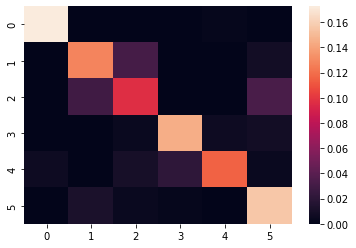

In [85]:
y_pred = model9.predict(val_windows_r)
y_pred = np.argmax(y_pred, axis=3)
y_pred = y_pred.reshape(val_windows_r.shape[0],)

sns.heatmap(confusion_matrix(y,y_pred, normalize = 'all'), fmt='g')

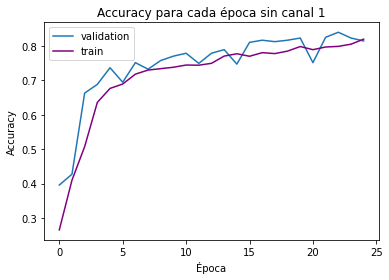

In [86]:
plt.plot(range(0,len(history9.history['val_accuracy'])), history9.history['val_accuracy'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.title("Accuracy para cada época sin canal 1")
plt.plot(range(0,len(history9.history['accuracy'])), history9.history['accuracy'], label = "train", color = 'purple')
plt.legend()


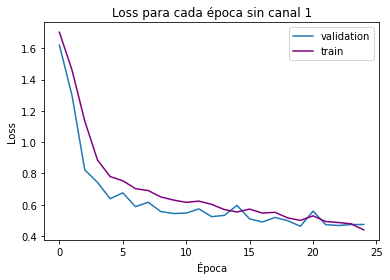

In [87]:
plt.plot(range(0,len(history9.history['val_loss'])), history9.history['val_loss'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss para cada época sin canal 1")
plt.plot(range(0,len(history9.history['loss'])), history9.history['loss'], label = "train", color = 'purple')
plt.legend()

## Sin canal 5

In [88]:
train_df_f = train_df.drop(columns=['channel5'])
val_df_f = val_df.drop(columns=['channel5'])
train_windows, train_classes = train_window_generator_matrix_2(train_df_f, 800, 250,5)
val_windows, val_classes = train_window_generator_matrix_2(val_df_f, 800, 250,5)

In [89]:
#create model
model10 = Sequential()

model10.add(layers.Conv2D(filters=32, kernel_size=(1, 4), activation="relu", input_shape=(1,800 ,7), data_format = "channels_last"))
model10.add(layers.Dropout(0.15))

model10.add(layers.ZeroPadding2D(padding=(1, 1)))
model10.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model10.add(layers.Dropout(0.15))
model10.add(layers.MaxPooling2D(pool_size=(1, 3), padding='valid'))

model10.add(layers.ZeroPadding2D(padding=(2, 2)))
model10.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model10.add(layers.Dropout(0.15))
model10.add(layers.MaxPooling2D(pool_size=(1, 1), padding='valid'))

model10.add(layers.ZeroPadding2D(padding=(2, 0)))
model10.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model10.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model10.add(layers.Dropout(0.15))

model10.add(layers.Conv2D(filters=64, kernel_size=(1, 5), activation="relu"))
model10.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model10.add(layers.Dropout(0.15))


model10.add(layers.Conv2D(filters=64, kernel_size=(1, 3), activation="relu"))
model10.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model10.add(layers.Dropout(0.15))


model10.add(layers.Conv2D(filters=6, kernel_size=(1, 1), activation="softmax"))
#model2.add(layers.Dense(6, activation="softmax"))
model10.summary()

#compile model using accuracy to measure model performance
model10.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 1, 797, 32)        928       
                                                                 
 dropout_44 (Dropout)        (None, 1, 797, 32)        0         
                                                                 
 zero_padding2d_24 (ZeroPadd  (None, 3, 799, 32)       0         
 ing2D)                                                          
                                                                 
 conv2d_51 (Conv2D)          (None, 1, 797, 32)        9248      
                                                                 
 dropout_45 (Dropout)        (None, 1, 797, 32)        0         
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 1, 265, 32)       0         
 g2D)                                                 

In [90]:
train_ex = np.expand_dims(train_windows, axis=0)
train_windows_r = train_windows.reshape(len(train_windows), 1, 800,7)
val_windows_r = val_windows.reshape(len(val_windows), 1, 800,7)

In [91]:
# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
print(train_windows.shape)
print(np.array(train_classes).shape)
history10 = model10.fit(train_windows_r, np.array(train_classes).reshape(len(train_classes), 1, 1,6), validation_data=(val_windows_r, np.array(val_classes).reshape(len(val_classes), 1, 1,6)),batch_size=batch_size, epochs=25)

Fit on NumPy data
(2193, 800, 7)
(2193, 1, 6)
Epoch 1/25
35/35 [==============================] - 2s 24ms/step - loss: 1.6475 - accuracy: 0.2627 - val_loss: 1.5454 - val_accuracy: 0.2863
Epoch 2/25
35/35 [==============================] - 1s 17ms/step - loss: 1.3428 - accuracy: 0.4259 - val_loss: 1.1253 - val_accuracy: 0.5663
Epoch 3/25
35/35 [==============================] - 1s 16ms/step - loss: 1.0021 - accuracy: 0.5663 - val_loss: 0.9168 - val_accuracy: 0.5979
Epoch 4/25
35/35 [==============================] - 1s 17ms/step - loss: 0.8926 - accuracy: 0.6202 - val_loss: 0.9956 - val_accuracy: 0.5832
Epoch 5/25
35/35 [==============================] - 1s 16ms/step - loss: 0.8526 - accuracy: 0.6452 - val_loss: 0.8979 - val_accuracy: 0.6232
Epoch 6/25
35/35 [==============================] - 1s 17ms/step - loss: 0.7558 - accuracy: 0.6867 - val_loss: 0.7641 - val_accuracy: 0.6611
Epoch 7/25
35/35 [==============================] - 1s 17ms/step - loss: 0.7063 - accuracy: 0.7095 - val_los

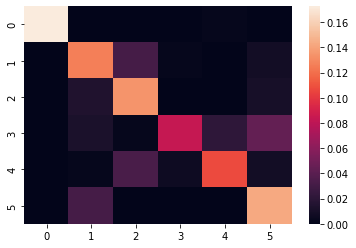

In [92]:
y_pred = model10.predict(val_windows_r)
y_pred = np.argmax(y_pred, axis=3)
y_pred = y_pred.reshape(val_windows_r.shape[0],)

sns.heatmap(confusion_matrix(y,y_pred, normalize = 'all'), fmt='g')

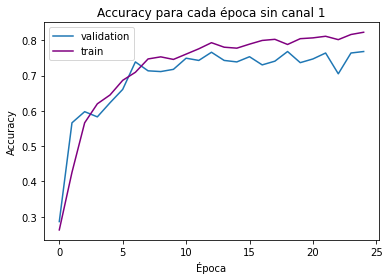

In [93]:
plt.plot(range(0,len(history10.history['val_accuracy'])), history10.history['val_accuracy'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.title("Accuracy para cada época sin canal 1")
plt.plot(range(0,len(history10.history['accuracy'])), history10.history['accuracy'], label = "train", color = 'purple')
plt.legend()

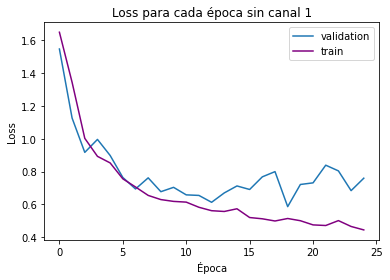

In [94]:
plt.plot(range(0,len(history10.history['val_loss'])), history10.history['val_loss'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss para cada época sin canal 1")
plt.plot(range(0,len(history10.history['loss'])), history10.history['loss'], label = "train", color = 'purple')
plt.legend()

## Sin canal 6 

In [95]:
train_df_f = train_df.drop(columns=['channel6'])
val_df_f = val_df.drop(columns=['channel6'])
train_windows, train_classes = train_window_generator_matrix_2(train_df_f, 800, 250,6)
val_windows, val_classes = train_window_generator_matrix_2(val_df_f, 800, 250,6)

In [96]:
#create model
model11 = Sequential()

model11.add(layers.Conv2D(filters=32, kernel_size=(1, 4), activation="relu", input_shape=(1,800 ,7), data_format = "channels_last"))
model11.add(layers.Dropout(0.15))

model11.add(layers.ZeroPadding2D(padding=(1, 1)))
model11.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model11.add(layers.Dropout(0.15))
model11.add(layers.MaxPooling2D(pool_size=(1, 3), padding='valid'))

model11.add(layers.ZeroPadding2D(padding=(2, 2)))
model11.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model11.add(layers.Dropout(0.15))
model11.add(layers.MaxPooling2D(pool_size=(1, 1), padding='valid'))

model11.add(layers.ZeroPadding2D(padding=(2, 0)))
model11.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model11.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model11.add(layers.Dropout(0.15))

model11.add(layers.Conv2D(filters=64, kernel_size=(1, 5), activation="relu"))
model11.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model11.add(layers.Dropout(0.15))


model11.add(layers.Conv2D(filters=64, kernel_size=(1, 3), activation="relu"))
model11.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model11.add(layers.Dropout(0.15))


model11.add(layers.Conv2D(filters=6, kernel_size=(1, 1), activation="softmax"))
#model2.add(layers.Dense(6, activation="softmax"))
model11.summary()

#compile model using accuracy to measure model performance
model11.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 1, 797, 32)        928       
                                                                 
 dropout_50 (Dropout)        (None, 1, 797, 32)        0         
                                                                 
 zero_padding2d_27 (ZeroPadd  (None, 3, 799, 32)       0         
 ing2D)                                                          
                                                                 
 conv2d_58 (Conv2D)          (None, 1, 797, 32)        9248      
                                                                 
 dropout_51 (Dropout)        (None, 1, 797, 32)        0         
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 1, 265, 32)       0         
 g2D)                                                 

In [97]:
train_ex = np.expand_dims(train_windows, axis=0)
train_windows_r = train_windows.reshape(len(train_windows), 1, 800,7)
val_windows_r = val_windows.reshape(len(val_windows), 1, 800,7)

In [98]:
# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
print(train_windows.shape)
print(np.array(train_classes).shape)
history11 = model11.fit(train_windows_r, np.array(train_classes).reshape(len(train_classes), 1, 1,6), validation_data=(val_windows_r, np.array(val_classes).reshape(len(val_classes), 1, 1,6)),batch_size=batch_size, epochs=25)

Fit on NumPy data
(2193, 800, 7)
(2193, 1, 6)
Epoch 1/25
35/35 [==============================] - 2s 24ms/step - loss: 1.6351 - accuracy: 0.3000 - val_loss: 1.4579 - val_accuracy: 0.4653
Epoch 2/25
35/35 [==============================] - 1s 17ms/step - loss: 1.2902 - accuracy: 0.4647 - val_loss: 1.0518 - val_accuracy: 0.5179
Epoch 3/25
35/35 [==============================] - 1s 17ms/step - loss: 1.0419 - accuracy: 0.5249 - val_loss: 1.0397 - val_accuracy: 0.5747
Epoch 4/25
35/35 [==============================] - 1s 17ms/step - loss: 0.9273 - accuracy: 0.5828 - val_loss: 0.8406 - val_accuracy: 0.6274
Epoch 5/25
35/35 [==============================] - 1s 16ms/step - loss: 0.8780 - accuracy: 0.6124 - val_loss: 0.8203 - val_accuracy: 0.6126
Epoch 6/25
35/35 [==============================] - 1s 17ms/step - loss: 0.8731 - accuracy: 0.6206 - val_loss: 0.7896 - val_accuracy: 0.6337
Epoch 7/25
35/35 [==============================] - 1s 17ms/step - loss: 0.8259 - accuracy: 0.6389 - val_los

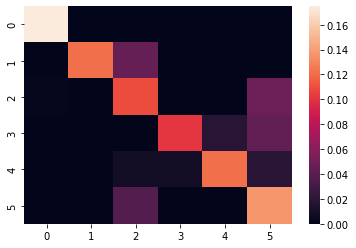

In [99]:
y_pred = model11.predict(val_windows_r)
y_pred = np.argmax(y_pred, axis=3)
y_pred = y_pred.reshape(val_windows_r.shape[0],)

sns.heatmap(confusion_matrix(y,y_pred, normalize = 'all'), fmt='g')

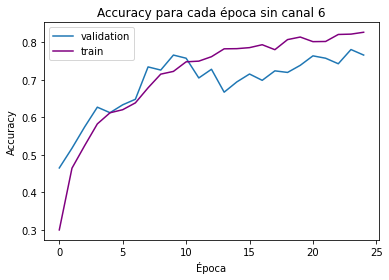

In [100]:
plt.plot(range(0,len(history11.history['val_accuracy'])), history11.history['val_accuracy'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.title("Accuracy para cada época sin canal 6")
plt.plot(range(0,len(history11.history['accuracy'])), history11.history['accuracy'], label = "train", color = 'purple')
plt.legend()

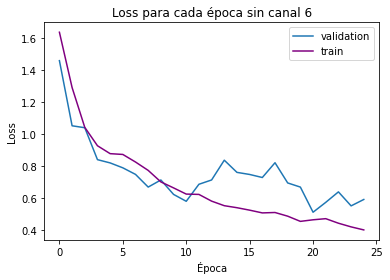

In [101]:
plt.plot(range(0,len(history11.history['val_loss'])), history11.history['val_loss'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss para cada época sin canal 6")
plt.plot(range(0,len(history11.history['loss'])), history11.history['loss'], label = "train", color = 'purple')
plt.legend()

## Sin canal 7

In [102]:
train_df_f = train_df.drop(columns=['channel7'])
val_df_f = val_df.drop(columns=['channel7'])
train_windows, train_classes = train_window_generator_matrix_2(train_df_f, 800, 250,7)
val_windows, val_classes = train_window_generator_matrix_2(val_df_f, 800, 250,7)

In [103]:
#create model
model12 = Sequential()

model12.add(layers.Conv2D(filters=32, kernel_size=(1, 4), activation="relu", input_shape=(1,800 ,7), data_format = "channels_last"))
model12.add(layers.Dropout(0.15))

model12.add(layers.ZeroPadding2D(padding=(1, 1)))
model12.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model12.add(layers.Dropout(0.15))
model12.add(layers.MaxPooling2D(pool_size=(1, 3), padding='valid'))

model12.add(layers.ZeroPadding2D(padding=(2, 2)))
model12.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model12.add(layers.Dropout(0.15))
model12.add(layers.MaxPooling2D(pool_size=(1, 1), padding='valid'))

model12.add(layers.ZeroPadding2D(padding=(2, 0)))
model12.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model12.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model12.add(layers.Dropout(0.15))

model12.add(layers.Conv2D(filters=64, kernel_size=(1, 5), activation="relu"))
model12.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model12.add(layers.Dropout(0.15))


model12.add(layers.Conv2D(filters=64, kernel_size=(1, 3), activation="relu"))
model12.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model12.add(layers.Dropout(0.15))


model12.add(layers.Conv2D(filters=6, kernel_size=(1, 1), activation="softmax"))
#model2.add(layers.Dense(6, activation="softmax"))
model12.summary()

#compile model using accuracy to measure model performance
model12.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 1, 797, 32)        928       
                                                                 
 dropout_56 (Dropout)        (None, 1, 797, 32)        0         
                                                                 
 zero_padding2d_30 (ZeroPadd  (None, 3, 799, 32)       0         
 ing2D)                                                          
                                                                 
 conv2d_65 (Conv2D)          (None, 1, 797, 32)        9248      
                                                                 
 dropout_57 (Dropout)        (None, 1, 797, 32)        0         
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 1, 265, 32)       0         
 g2D)                                                

In [104]:
train_ex = np.expand_dims(train_windows, axis=0)
train_windows_r = train_windows.reshape(len(train_windows), 1, 800,7)
val_windows_r = val_windows.reshape(len(val_windows), 1, 800,7)

In [105]:
# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
print(train_windows.shape)
print(np.array(train_classes).shape)
history12 = model12.fit(train_windows_r, np.array(train_classes).reshape(len(train_classes), 1, 1,6), validation_data=(val_windows_r, np.array(val_classes).reshape(len(val_classes), 1, 1,6)),batch_size=batch_size, epochs=25)

Fit on NumPy data
(2193, 800, 7)
(2193, 1, 6)
Epoch 1/25
35/35 [==============================] - 2s 24ms/step - loss: 1.6771 - accuracy: 0.2335 - val_loss: 1.5901 - val_accuracy: 0.3979
Epoch 2/25
35/35 [==============================] - 1s 16ms/step - loss: 1.4724 - accuracy: 0.3976 - val_loss: 1.4070 - val_accuracy: 0.4147
Epoch 3/25
35/35 [==============================] - 1s 16ms/step - loss: 1.3032 - accuracy: 0.4510 - val_loss: 1.2171 - val_accuracy: 0.4863
Epoch 4/25
35/35 [==============================] - 1s 17ms/step - loss: 1.1137 - accuracy: 0.5226 - val_loss: 1.1173 - val_accuracy: 0.5032
Epoch 5/25
35/35 [==============================] - 1s 17ms/step - loss: 1.0648 - accuracy: 0.5609 - val_loss: 1.0547 - val_accuracy: 0.5789
Epoch 6/25
35/35 [==============================] - 1s 17ms/step - loss: 0.9884 - accuracy: 0.5933 - val_loss: 0.9787 - val_accuracy: 0.5768
Epoch 7/25
35/35 [==============================] - 1s 17ms/step - loss: 0.8850 - accuracy: 0.6566 - val_los

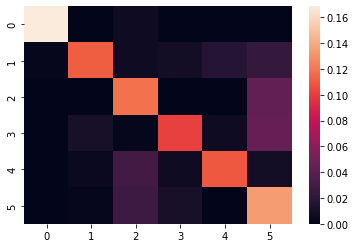

In [106]:
y_pred = model12.predict(val_windows_r)
y_pred = np.argmax(y_pred, axis=3)
y_pred = y_pred.reshape(val_windows_r.shape[0],)

sns.heatmap(confusion_matrix(y,y_pred, normalize = 'all'), fmt='g')

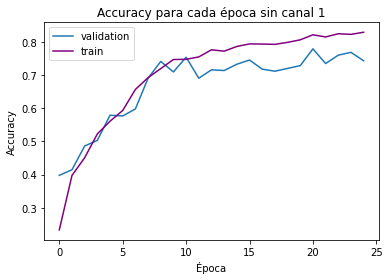

In [107]:
plt.plot(range(0,len(history12.history['val_accuracy'])), history12.history['val_accuracy'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.title("Accuracy para cada época sin canal 1")
plt.plot(range(0,len(history12.history['accuracy'])), history12.history['accuracy'], label = "train", color = 'purple')
plt.legend()

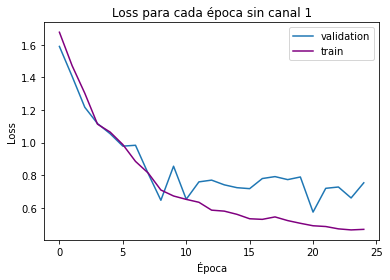

In [108]:
plt.plot(range(0,len(history12.history['val_loss'])), history12.history['val_loss'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss para cada época sin canal 1")
plt.plot(range(0,len(history12.history['loss'])), history12.history['loss'], label = "train", color = 'purple')
plt.legend()

## Sin canal 8

In [109]:
train_df_f = train_df.drop(columns=['channel8'])
val_df_f = val_df.drop(columns=['channel8'])
train_windows, train_classes = train_window_generator_matrix_2(train_df_f, 800, 250,8)
val_windows, val_classes = train_window_generator_matrix_2(val_df_f, 800, 250,8)

In [110]:
#create model
model13 = Sequential()

model13.add(layers.Conv2D(filters=32, kernel_size=(1, 4), activation="relu", input_shape=(1,800 ,7), data_format = "channels_last"))
model13.add(layers.Dropout(0.15))

model13.add(layers.ZeroPadding2D(padding=(1, 1)))
model13.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model13.add(layers.Dropout(0.15))
model13.add(layers.MaxPooling2D(pool_size=(1, 3), padding='valid'))

model13.add(layers.ZeroPadding2D(padding=(2, 2)))
model13.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model13.add(layers.Dropout(0.15))
model13.add(layers.MaxPooling2D(pool_size=(1, 1), padding='valid'))

model13.add(layers.ZeroPadding2D(padding=(2, 0)))
model13.add(layers.Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model13.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model13.add(layers.Dropout(0.15))

model13.add(layers.Conv2D(filters=64, kernel_size=(1, 5), activation="relu"))
model13.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model13.add(layers.Dropout(0.15))


model13.add(layers.Conv2D(filters=64, kernel_size=(1, 3), activation="relu"))
model13.add(layers.MaxPooling2D(pool_size=(1, 5), padding='valid'))
model13.add(layers.Dropout(0.15))


model13.add(layers.Conv2D(filters=6, kernel_size=(1, 1), activation="softmax"))
#model2.add(layers.Dense(6, activation="softmax"))
model13.summary()

#compile model using accuracy to measure model performance
model13.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 1, 797, 32)        928       
                                                                 
 dropout_62 (Dropout)        (None, 1, 797, 32)        0         
                                                                 
 zero_padding2d_33 (ZeroPadd  (None, 3, 799, 32)       0         
 ing2D)                                                          
                                                                 
 conv2d_72 (Conv2D)          (None, 1, 797, 32)        9248      
                                                                 
 dropout_63 (Dropout)        (None, 1, 797, 32)        0         
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 1, 265, 32)       0         
 g2D)                                                

In [111]:
train_ex = np.expand_dims(train_windows, axis=0)
train_windows_r = train_windows.reshape(len(train_windows), 1, 800,7)
val_windows_r = val_windows.reshape(len(val_windows), 1, 800,7)

In [112]:
# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
print(train_windows.shape)
print(np.array(train_classes).shape)
history13 = model13.fit(train_windows_r, np.array(train_classes).reshape(len(train_classes), 1, 1,6), validation_data=(val_windows_r, np.array(val_classes).reshape(len(val_classes), 1, 1,6)),batch_size=batch_size, epochs=25)

Fit on NumPy data
(2193, 800, 7)
(2193, 1, 6)
Epoch 1/25
35/35 [==============================] - 2s 25ms/step - loss: 1.6728 - accuracy: 0.2531 - val_loss: 1.5837 - val_accuracy: 0.3705
Epoch 2/25
35/35 [==============================] - 1s 17ms/step - loss: 1.4158 - accuracy: 0.4478 - val_loss: 1.0398 - val_accuracy: 0.5768
Epoch 3/25
35/35 [==============================] - 1s 17ms/step - loss: 0.9378 - accuracy: 0.5805 - val_loss: 0.7735 - val_accuracy: 0.6653
Epoch 4/25
35/35 [==============================] - 1s 17ms/step - loss: 0.8626 - accuracy: 0.6279 - val_loss: 0.7362 - val_accuracy: 0.6968
Epoch 5/25
35/35 [==============================] - 1s 17ms/step - loss: 0.7931 - accuracy: 0.6635 - val_loss: 0.7251 - val_accuracy: 0.6821
Epoch 6/25
35/35 [==============================] - 1s 17ms/step - loss: 0.7448 - accuracy: 0.6917 - val_loss: 0.6634 - val_accuracy: 0.7158
Epoch 7/25
35/35 [==============================] - 1s 17ms/step - loss: 0.7306 - accuracy: 0.6972 - val_los

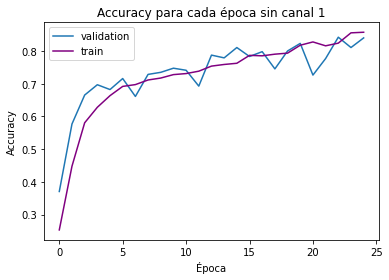

In [113]:
plt.plot(range(0,len(history13.history['val_accuracy'])), history13.history['val_accuracy'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.title("Accuracy para cada época sin canal 1")
plt.plot(range(0,len(history13.history['accuracy'])), history13.history['accuracy'], label = "train", color = 'purple')
plt.legend()

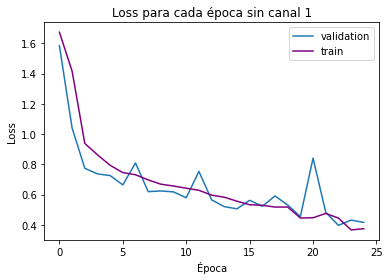

In [114]:
plt.plot(range(0,len(history13.history['val_loss'])), history13.history['val_loss'], label = "validation")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.title("Loss para cada época sin canal 1")
plt.plot(range(0,len(history13.history['loss'])), history13.history['loss'], label = "train", color = 'purple')
plt.legend()

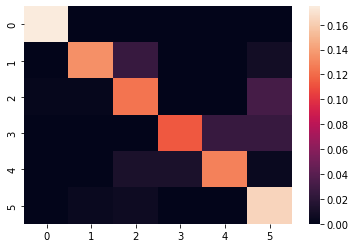

In [115]:
y_pred = model13.predict(val_windows_r)
y_pred = np.argmax(y_pred, axis=3)
y_pred = y_pred.reshape(val_windows_r.shape[0],)

sns.heatmap(confusion_matrix(y,y_pred, normalize = 'all'), fmt='g')

## output

In [116]:
from typing_extensions import ParamSpecArgs
def test_dataset_generator_matrix2(df):
  #normalizacion
  for channel in range(1, 9):
    if channel != 8:
      all = df.iloc[:,(channel-1)*800+1 : channel*800 +1]
      all_normed = all/all.abs().max()
      df.iloc[:,(channel-1)*800+1 : channel*800 +1] = all_normed

  #i ----> fila
  #j ----> columna
  id=0
  #dataset sera una matriz de dimensiones: cantidad de ventanas x dimension ventana x cantidad canales
  w_test_df = np.zeros((len(df), 800, 7))
  condition = True
  while condition:
    if len(df) <= id:
      condition = False
    else:
      for channel in range(1,9):
        if channel != 8:
          window = df.iloc[id,(channel-1)*800 + 1:channel*800 +1].to_numpy()
          for i in range(0,len(window)):
            if channel < 8:
              w_test_df[id][i][channel-1] = window[i]
            else:
              w_test_df[id][i][channel-2] = window[i]
      id += 1
      
  return w_test_df
test_windows = test_dataset_generator_matrix2(test_df)

In [117]:
predictions = model13.predict(test_windows.reshape(len(test_windows), 1, 800,7))
p = np.argmax(predictions, axis=3)
p = p.reshape(672,)

r = pd.DataFrame(columns = ['Id', 'Category'])
for i in range(0,len(p)):
  r.loc[i,'Id']=i
  r.loc[i,'Category']=p[i]+1

In [118]:
compression_opts = dict(method='zip',archive_name='signal8.csv')  

r.to_csv('signal8.zip', index=False, compression=compression_opts)